# YOCP Viscosity

In [1]:
# Import the usual libraries
%pylab
%matplotlib inline

import os
plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess


# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'yocp_viscosity.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
pre = PreProcess(input_file_name)
pre.setup(read_yaml=True)
pre.run()







  _________             __                   
 /   _____/____ _______|  | _______    ______
 \_____  \\__  \\_  __ \  |/ /\__  \  /  ___/
 /        \/ __ \|  | \/    <  / __ \_\___ \ 
/_______  (____  /__|  |__|_ \(____  /____  >
        \/     \/           \/     \/     \/ 


An open-source pure-python molecular dynamics suite for non-ideal plasmas.



* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                 Preprocessing                                  
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  yocp_kappa2
Job directory:  Simulations/yocp_kappa2

Equilibration dumps directory: 
 Simulations/yocp_kappa2/PreProcessing/Equilibration/dumps
Production dumps directory: 
 Simulations/yocp_kappa2/PreProcessing/Production/dumps

Equilibration Thermodynamics file: 
 Simulations/yocp_kappa2/PreProcessing/Equilibration/EquilibrationEnergy_yocp_kap

  0%|          | 0/10 [00:00<?, ?it/s]

Time of a single equilibration step averaged over 9 steps: 
0 min 0 sec 18 msec 374 usec 977 nsec 



  0%|          | 0/10 [00:00<?, ?it/s]

Time of a single production step averaged over 9 steps: 
0 min 0 sec 18 msec 976 usec 976 nsec 



----------------------- Total Estimated Times ------------------------ 


Equilibration Time: 0 hrs 1 min 31 sec

Production Time: 2 hrs 38 min 8 sec

Total Run Time: 2 hrs 39 min 40 sec


========================= Filesize Estimates ========================= 


Equilibration:

Checkpoint filesize: 0 GB 0 MB 450 KB 906 bytes
Checkpoint folder size: 0 GB 220 MB 162 KB 392 bytes

Production:

Checkpoint filesize: 0 GB 0 MB 450 KB 906 bytes
Checkpoint folder size: 42 GB 1023 MB 732 KB 576 bytes

Total minimum needed space: 43 GB 219 MB 894 KB 968 bytes


In [3]:
# sim = Simulation(input_file_name)
# sim.setup(read_yaml=True)
# sim.run()




* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                 Postprocessing                                 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  yocp
Job directory:  Simulations/yocp
PostProcessing directory: 
 Simulations/yocp/PostProcessing

Equilibration dumps directory:  Simulations/yocp/Simulation/Equilibration/dumps
Production dumps directory: 
 Simulations/yocp/Simulation/Production/dumps

Equilibration Thermodynamics file: 
 Simulations/yocp/Simulation/Equilibration/EquilibrationEnergy_yocp.csv
Production Thermodynamics file: 
 Simulations/yocp/Simulation/Production/ProductionEnergy_yocp.csv


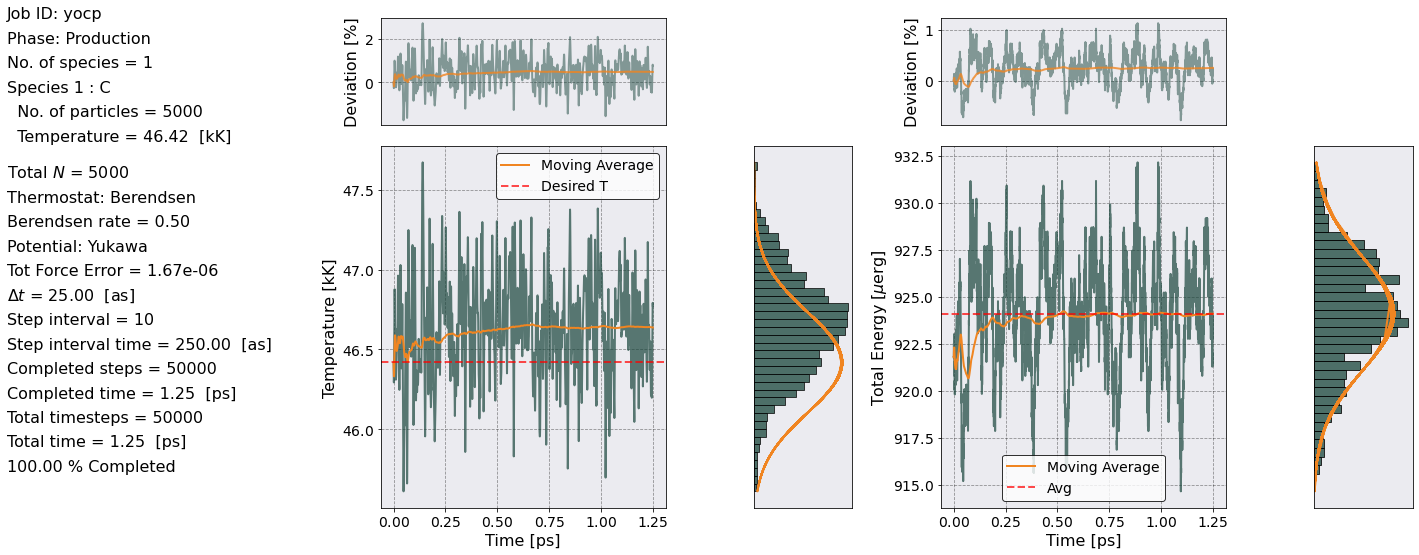

In [30]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)

postproc.therm.setup(postproc.parameters)
postproc.therm.temp_energy_plot(postproc,)

In [5]:
from sarkas.tools.transport import TransportCoefficient



======================= Viscosity Coefficient ======================== 


Calculating pressure tensor and its acf for slice 1/2.


Calculating Pressure:   0%|          | 0/2500 [00:00<?, ?it/s]


Calculating pressure tensor and its acf for slice 2/2.


Calculating Pressure:   0%|          | 0/2500 [00:00<?, ?it/s]


Pressure Tensor and its ACF Calculation Time: 0 hrs 0 min 5 sec
Data saved in: 
 Simulations/yocp/PostProcessing/PressureTensor/Production/Viscosities_yocp.h5

No. of slices = 2
No. dumps per slice = 250
Time interval of autocorrelation function = 6.2500e-14 [s] ~ 48 w_p T


  0%|          | 0/2 [00:00<?, ?it/s]

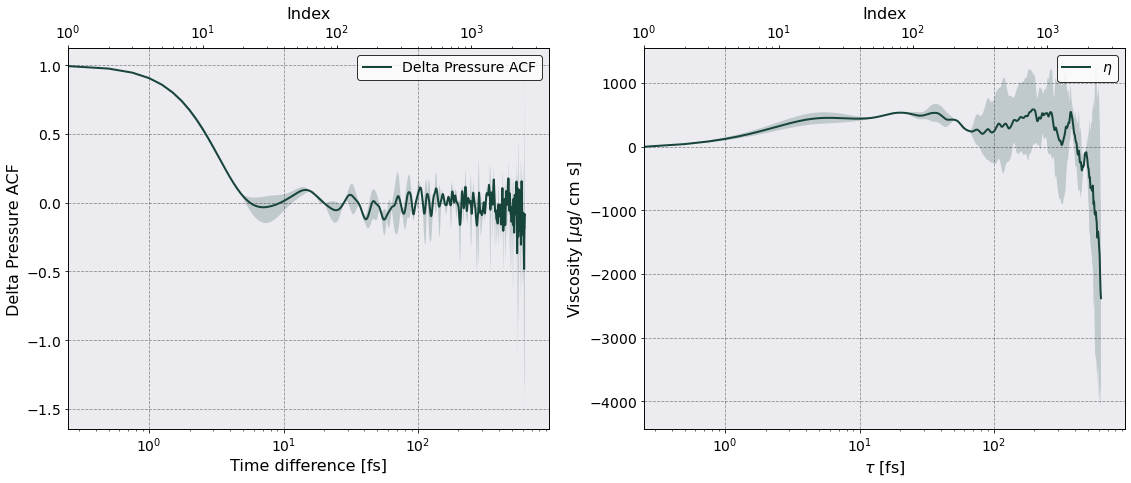

In [7]:
eta = TransportCoefficient.viscosity(postproc.parameters, 
                                     compute_acf=True,
                                     no_slices = 2)

Text(0.5, 0, 'Time [fs]')

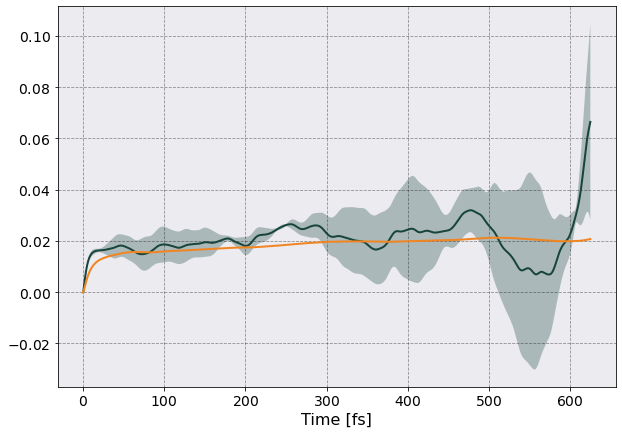

In [27]:
norms = postproc.parameters.species_masses[0]*postproc.parameters.total_num_density*postproc.parameters.total_plasma_frequency*postproc.parameters.a_ws**2
fig, ax = plt.subplots(1,1,)
ax.plot(eta['Time']*1e15, 
         eta[('Shear Viscosity', 'Mean')]/norms)

ax.fill_between(eta['Time'].to_numpy()[:,0]*1e15, 
                 (eta[('Shear Viscosity', 'Mean')] - eta[('Shear Viscosity', 'Std')])/norms, 
                 (eta[('Shear Viscosity', 'Mean')] + eta[('Shear Viscosity', 'Std')])/norms,
                alpha = 0.3)

ax.plot(eta['Time']*1e15, 
         eta[('Shear Viscosity', 'Mean')].expanding().mean()/norms)
ax.set_xlabel(r'Time [fs]')
# plt.ylim(0,1)

In [21]:
(eta[('Shear Viscosity', 'Mean')] + eta[('Shear Viscosity', 'Std')])/norms

0       0.000000
1       0.000000
2       0.000719
3       0.001435
4       0.002145
          ...   
2495    0.100207
2496    0.101297
2497    0.102418
2498    0.103574
2499    0.104768
Length: 2500, dtype: float64

In [25]:
eta["Time"].to_numpy()[:,0]

array([0.0000e+00, 2.5000e-16, 5.0000e-16, ..., 6.2425e-13, 6.2450e-13,
       6.2475e-13])